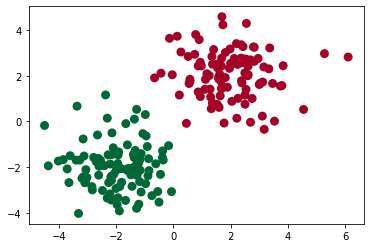

loss: 0.7613444  accuracy: 0.475


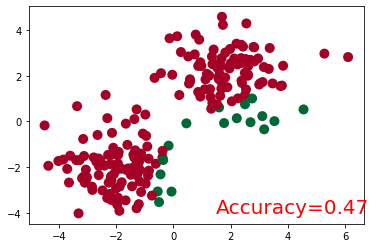

loss: 0.122721635  accuracy: 0.8954545


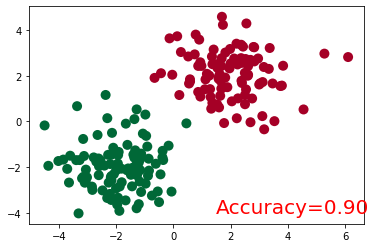

loss: 0.06178957  accuracy: 0.94285715


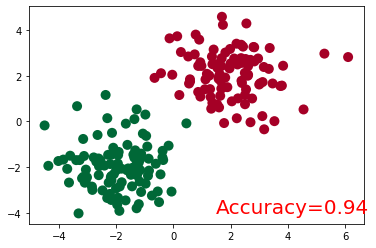

loss: 0.041627053  accuracy: 0.96016127


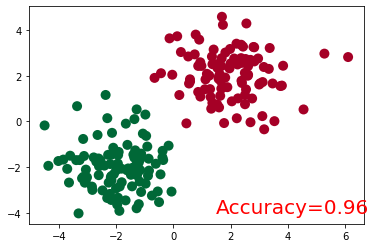

loss: 0.031681385  accuracy: 0.9698781


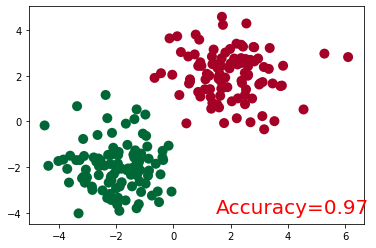

loss: 0.025670018  accuracy: 0.9757843


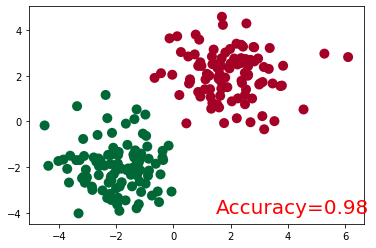

loss: 0.021705417  accuracy: 0.9797541


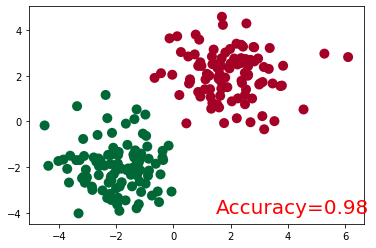

loss: 0.018876733  accuracy: 0.98260564


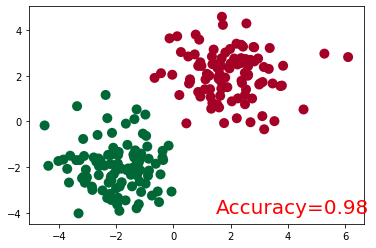

loss: 0.016746005  accuracy: 0.9847531


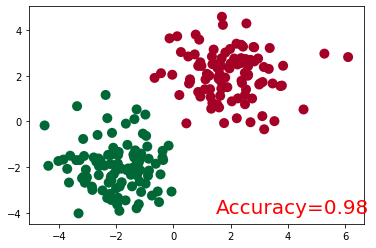

loss: 0.015077561  accuracy: 0.98642856


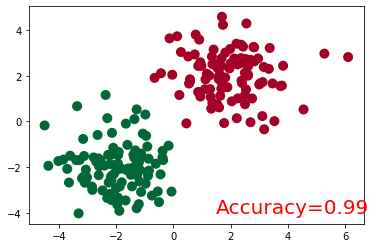

loss: 0.013743277  accuracy: 0.9877723


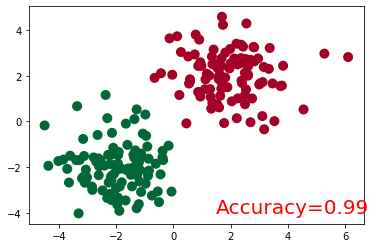

loss: 0.012647447  accuracy: 0.9888739


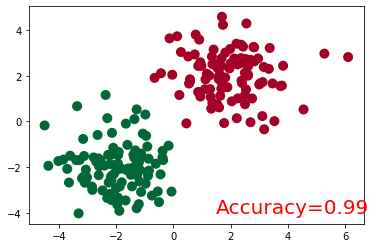

loss: 0.011728641  accuracy: 0.98979336


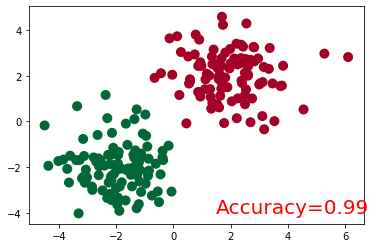

loss已達標
loss: 0.01094612  accuracy: 0.9905725


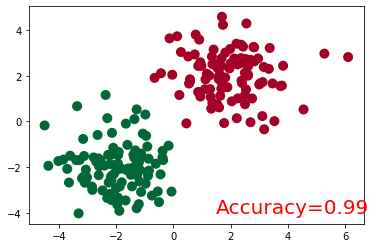

In [61]:
import tensorflow as tf
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
tf.set_random_seed(2)
np.random.seed(2)

def add_layer(inputs, input_size, output_size, activation_function = None):
  Weights = tf.Variable(tf.random_normal([input_size, output_size]))
  threshold = tf.Variable(tf.zeros([1, output_size]) + 0.1)
  Wx_plus_b = tf.matmul(inputs, Weights) + threshold
  if activation_function is None:
    outputs = Wx_plus_b
  else:
    outputs = activation_function(Wx_plus_b)
  return outputs

n_data = np.ones((100,2))
x0 = np.random.normal(2*n_data, 1)
x1 = np.random.normal(-2*n_data, 1)
y0 = np.zeros(100)
y1 = np.ones(100)

y = np.hstack([y0, y1])
x = np.vstack([x0, x1])
plt.scatter(x[:, 0], x[:, 1], c=y, s=80, lw=0, cmap='RdYlGn') 
plt.show()

tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)

temp_x0 = x0
temp_y0 = y0

epoch = 1

tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape) 

l1 = tf.layers.dense(tf_x, 10, tf.nn.relu)
outputs = tf.layers.dense(l1, 2)

loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=outputs)

accuracy = tf.metrics.accuracy(labels=tf_y, predictions=tf.argmax(outputs, axis=1))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train_step = optimizer.minimize(loss)

plt.ion()
init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

with tf.Session() as sess:
  sess.run(init)
  for i in range(1000):
    _,loss_,acura_,pred_ = sess.run([train_step,loss,accuracy,outputs],{tf_x:x, tf_y:y})
    if i % 10 == 0: 
      if(loss_ <= 0.05 and acura_[1] >= 0.99):
        print("loss已達標")
        print('loss:',loss_,' accuracy:',acura_[1])
        x0 = temp_x0
        y0 = temp_y0
        n_data = 1.2 * n_data
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred_.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acura_[1], fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        break
      else:      
        n_data = 0.7 * n_data
        x0 = temp_x0
        y0 = temp_y0
        print('loss:',loss_,' accuracy:',acura_[1])
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred_.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acura_[1], fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
      plt.ioff()
      plt.show()